In [1]:
#Modules for EDA steps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection and Preprocessing

In [2]:
#Reading Data
df=pd.read_csv('fraudTrain.csv')

In [3]:
#size of DataSet
df.shape

(1296675, 23)

In [4]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
#data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
#data details
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
#data details
print(f'Checking Null values in each column: {df.isna().sum()}')

Checking Null values in each column: trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [9]:
#data details
print(f'Checking Null values in df: {df.isna().sum().sum()}')

Checking Null values in df: 0


In [10]:
#data details
print(f'Checking Duplicate values in df: {df.duplicated().sum()}')

Checking Duplicate values in df: 0


In [11]:
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [12]:
print('Number of Unique Merchants -',df['merchant'].nunique())
print('Number of Unique Transaction Catergories -',df['category'].nunique())
print('Number of Unique Transaction addresses -',df['street'].nunique())
print('Number of Unique Jobs of Card Holders -',df['job'].nunique())
print('Number of Unique Transaction states -',df['state'].nunique())

Number of Unique Merchants - 693
Number of Unique Transaction Catergories - 14
Number of Unique Transaction addresses - 983
Number of Unique Jobs of Card Holders - 494
Number of Unique Transaction states - 51


**- Data Cleaning** 

In [13]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'],dayfirst=False)

In [14]:
#Deriving new features from date 
df['trans_hour']=df['trans_date_trans_time'].dt.hour
df['trans_day']=df['trans_date_trans_time'].dt.day_name()
df['trans_year_month']=df['trans_date_trans_time'].dt.to_period('M')

In [15]:
#Finding age and converting dob column to datetime
df['dob']=pd.to_datetime(df['dob'])
df['age']=np.round((df['trans_date_trans_time']-df['dob'])/np.timedelta64(365,'D')).astype('int')
df.age.head()

0    31
1    41
2    57
3    52
4    33
Name: age, dtype: int32

In [16]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'trans_day', 'trans_year_month',
       'age'],
      dtype='object')

In [17]:
#dropping unwanted columns
df.drop(['trans_date_trans_time','dob','first','last'],axis=1,inplace=True)
df.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_year_month,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41


In [18]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,1.280486e+01,4.603049e+01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,6.817824e+00,1.740749e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,1.400000e+01
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,7.000000e+00,3.300000e+01
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,1.400000e+01,4.400000e+01
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,1.900000e+01,5.700000e+01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01,9.600000e+01


In [19]:
fraud_non_fraud_per=df.is_fraud.value_counts(normalize=True)*100
fraud_non_fraud_per

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64

In [20]:
print(f'Percentage of non-fraud data in our dataset: {fraud_non_fraud_per[0]}')
print(f'Percentage of fraud data in our dataset: {fraud_non_fraud_per[1]}')

Percentage of non-fraud data in our dataset: 99.42113482561166
Percentage of fraud data in our dataset: 0.5788651743883394


#### Exploratory Data Analysis 

<Axes: xlabel='is_fraud'>

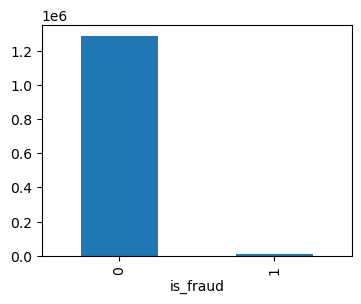

In [21]:
plt.figure(figsize=(4,3))
df.groupby('is_fraud').count()['cc_num'].plot.bar()

We can see that, as usual, the number of fraudulent transactions is much smaller, which can lead our model to predict non fraudulent (0) with higher performance than fraud (1) transactions.

**-Exploring Amount data**

In [22]:
pd.concat([df['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
     df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
     df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],axis=1)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.296675e+06,1.289169e+06,7506.000000
1,mean,7.035104e+01,6.766711e+01,531.320092
2,std,1.603160e+02,1.540080e+02,390.560070
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.752000e+01,4.728000e+01,396.505000
5,95%,1.963100e+02,1.899000e+02,1083.985000
6,99.9%,1.499254e+03,1.503696e+03,1291.038400
7,max,2.894890e+04,2.894890e+04,1376.040000


- The mean of the 'non-fraud amt distribution' is far less than the 'fraud amt distribution'

C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


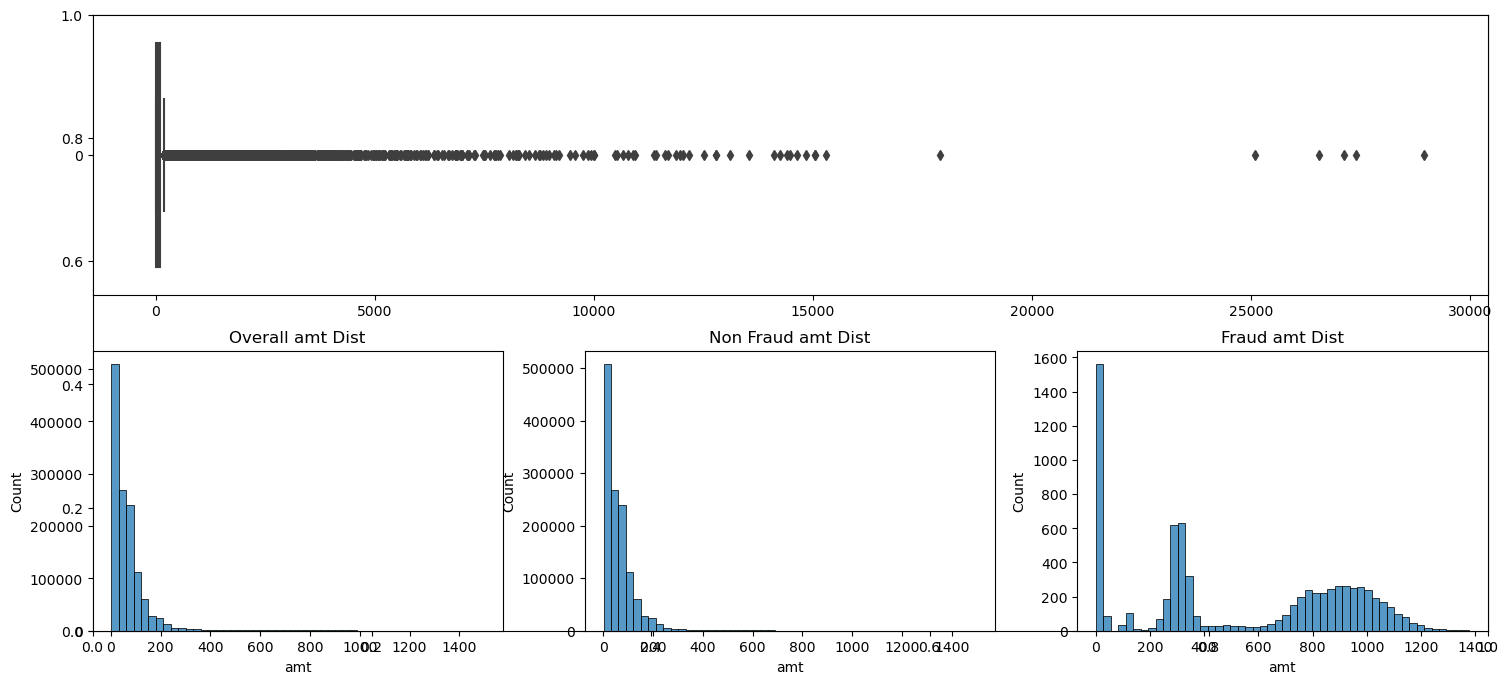

In [23]:
plt.subplots(figsize=(18,8))
graphs=[]
graphs.append(sns.boxplot(df.amt, ax=plt.subplot(211),orient='h'))
graphs.append(sns.histplot(df[df.amt <= 1500].amt, bins=50,ax=plt.subplot(234)))
graphs.append(sns.histplot(df[(df.is_fraud==0) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
graphs.append(sns.histplot(df[(df.is_fraud==1) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))
graphs[1].set_title('Overall amt Dist')
graphs[2].set_title('Non Fraud amt Dist')
graphs[3].set_title('Fraud amt Dist')
plt.show()

- From the above plots, it can be noted that the 'amt' feature has a lot of outliers. This means that, the variance in the feature is huge.


**Inference**:

- From the above plot, though the mean of the fraud amount seems to be more than that of the non fraud or the overall amount.
- From this, it can be observed that the fraud amount transaction often happens in small amount, often around 200 and at times in the range of 200 to 400.
- Therefore, the transactions in which small amount is involved can be monitored more closely in order to detect and prevent credit card fraud.

#### Exploring State data:

In [24]:
df.state.nunique()

51

since there are a lot of categories in the 'state' variable of the data, we will now only look at the top 15 states wherein the transaction frequencies are the highest.

Now, let us see the State - fraud distribution in the given dataframe.

In [25]:
#constructing the state-transaction count distribution
state = df[['state','trans_num']].groupby(['state']).count().reset_index()
state.columns = ['state', 'state_count']
#creating the state-fraud distribution
fraud_state = df[['state', 'trans_num', 'is_fraud']].groupby(['state','is_fraud']).count().reset_index()
fraud_state.columns = ['state', 'is_fraud', 'Transaction count']
fraud_state = fraud_state.merge(state[['state', 'state_count']], how='inner', on='state')
fraud_state['Transaction percentage'] = (fraud_state['Transaction count']/fraud_state['state_count'])*100
#viewing the top 15 states with high fraudulent transactions
fraud_state[fraud_state['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(15)

,state,is_fraud,Transaction count,state_count,Transaction percentage
16,DE,1,9,9,100.000000
78,RI,1,15,550,2.727273
1,AK,1,36,2120,1.698113
66,NV,1,47,5607,0.838238
11,CO,1,113,13880,0.814121
74,OR,1,149,18597,0.801204
84,TN,1,140,17554,0.797539
58,NE,1,180,24168,0.744786
42,ME,1,119,16505,0.720994
60,NH,1,59,8278,0.712733


In [26]:
print('state with more than 1% fraudulent transactions:\n')
print(fraud_state.loc[(fraud_state.is_fraud == 1) & (fraud_state['Transaction percentage'] >=1)]['state'])

state with more than 1% fraudulent transactions:

1     AK
16    DE
78    RI
Name: state, dtype: object


Observation (State feature):

- The states 'IN', 'VA', 'IA' have the most amount of transactions noted in the given dataset.
- The next highest in the list are 'KY', 'OR', 'CT', 'MS' and 'NM'. Majority of the transactions are happening in these states, and hence there is a high chance of fraudulent transaction.
- In the top 15 states with high transaction volumes, it can be noted that all states have a fraudulent transaction of about 0.5%. 'AK' is the most fraudulent state.

#### Exploring City and Zip data

In [27]:
print('number of cities: ',df['city'].nunique())
print('number of zip codes: ',df['zip'].nunique())

number of cities:  894
number of zip codes:  970


In [28]:
#constructing the city-transaction count distribution
city = df[['city','trans_num']].groupby(['city']).count().reset_index()
city.columns = ['city', 'city_count']

#creating the city-fraud distribution
fraud_city = df[['city', 'trans_num', 'is_fraud']].groupby(['city','is_fraud']).count().reset_index()
fraud_city.columns = ['city', 'is_fraud', 'Transaction count']

fraud_city = fraud_city.merge(city[['city', 'city_count']], how='inner', on='city')

fraud_city['Transaction percentage'] = (fraud_city['Transaction count']/fraud_city['city_count'])*100

#viewing the top 15 cities with high fraudulent transaction volumes
fraud_city[fraud_city['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(15)

,city,is_fraud,Transaction count,city_count,Transaction percentage
401,East China,1,9,9,100.0
1441,Walkertown,1,11,11,100.0
476,Freeport,1,9,9,100.0
483,Gaines,1,8,8,100.0
511,Granbury,1,12,12,100.0
1060,Orange Park,1,10,10,100.0
531,Greenport,1,10,10,100.0
101,Beacon,1,11,11,100.0
1444,Wappapello,1,8,8,100.0
989,Nicholson,1,9,9,100.0


In [29]:
#constructing the zip-transaction count distribution
df_zip = df[['zip','trans_num']].groupby(['zip']).count().reset_index()
df_zip.columns = ['zip', 'zip_count']

#creating the zip-fraud distribution
df_fraud_zip = df[['zip', 'trans_num', 'is_fraud']].groupby(['zip','is_fraud']).count().reset_index()
df_fraud_zip.columns = ['zip', 'is_fraud', 'Transaction count']

df_fraud_zip = df_fraud_zip.merge(df_zip[['zip', 'zip_count']], how='inner', on='zip')

df_fraud_zip['Transaction percentage'] = (df_fraud_zip['Transaction count']/df_fraud_zip['zip_count'])*100

#viewing the top 15 zip codes with high fraudulent transaction volumes
df_fraud_zip[df_fraud_zip['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(15)

,zip,is_fraud,Transaction count,zip_count,Transaction percentage
1363,77027,1,7,7,100.0
1315,75246,1,11,11,100.0
135,11944,1,10,10,100.0
1293,74108,1,10,10,100.0
130,11763,1,9,9,100.0
129,11747,1,15,15,100.0
527,32065,1,10,10,100.0
1064,61364,1,7,7,100.0
446,28412,1,9,9,100.0
1513,89109,1,8,8,100.0


C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


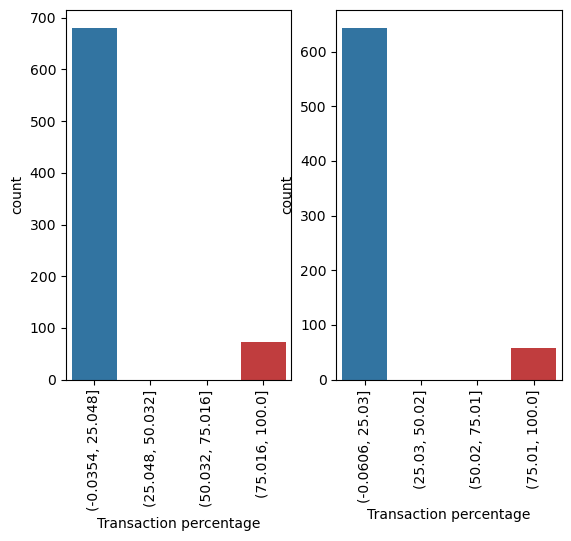

In [30]:
plt.subplot(1,2,1)
plot=sns.countplot(x=pd.cut(df_fraud_zip[df_fraud_zip.is_fraud == 1]['Transaction percentage'], bins = 4))
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
plot=sns.countplot(x=pd.cut(fraud_city[fraud_city.is_fraud == 1]['Transaction percentage'], bins = 4))
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

cities and zip codes with more fraudulent transactions

In [31]:
print('Cities with more than 75% fraudulent transactions:\n')
print(fraud_city.loc[(fraud_city.is_fraud == 1) & (fraud_city['Transaction percentage'] >= 75)].city.tolist())
print('\n\nZip codes with more than 75% fraudulent transactions:\n')
print(df_fraud_zip.loc[(df_fraud_zip.is_fraud == 1) & (df_fraud_zip['Transaction percentage'] >= 75)].zip.tolist())

Cities with more than 75% fraudulent transactions:

['Angwin', 'Ashland', 'Beacon', 'Brookfield', 'Bruce', 'Buellton', 'Byesville', 'Chattanooga', 'Clarion', 'Claypool', 'Clinton', 'Coulee Dam', 'Crouse', 'Downey', 'East China', 'Freeport', 'Gaines', 'Granbury', 'Greenport', 'Grenola', 'Hubbell', 'Irvington', 'Isanti', 'Kaktovik', 'Karns City', 'La Grande', 'Las Vegas', 'Lockhart', 'Madisonville', 'Marshall', 'Medford', 'Melville', 'Mineral', 'Morven', 'Moss Point', 'Mount Vernon', 'Mountain City', 'Nanuet', 'Nicholson', 'Noblesville', 'Norfolk', 'North East', 'Oakton', 'Orange Park', 'Phelps', 'Pleasant Hill', 'Queen Anne', 'Ridge Spring', 'Roland', 'Seattle', 'Streator', 'Vacaville', 'Walkertown', 'Wappapello', 'Wartburg', 'Waukau', 'West Frankfort', 'Winnsboro']


Zip codes with more than 75% fraudulent transactions:

[4032, 10018, 10533, 10553, 10954, 11747, 11763, 11944, 12207, 12508, 14532, 16041, 16214, 16428, 18446, 19947, 21657, 22124, 23117, 23523, 27051, 28033, 28119, 28412,

Observation ('city' and 'zip' features):
- From the above plot the places with high transaction frequencies can be observed.
- It is common knowledge that these zip codes and cities are some of the busiest places in the world which justifies the transaction frequencies in these areas.
- About 15 zip codes and 13 cities have more than 75% fraudlent transactions.

Inference:
- The people in these area can be educated about the risks associated with using credit cards with respect to frauds.

#### Exploring Job feature

In [32]:
df['job'].nunique()

494

In [33]:
#constructing the zip-transaction count distribution
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['job', 'job_count']

#creating the zip-fraud distribution
df_fraud_job = df[['job', 'trans_num', 'is_fraud']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['job', 'is_fraud', 'Transaction count']

df_fraud_job = df_fraud_job.merge(df_job[['job', 'job_count']], how='inner', on='job')

df_fraud_job['Transaction percentage'] = (df_fraud_job['Transaction count']/df_fraud_job['job_count'])*100

#viewing the top 20 jobs with high fraudulent transaction volumes
df_fraud_job[df_fraud_job['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,job,is_fraud,Transaction count,job_count,Transaction percentage
64,Armed forces technical officer,1,8,8,100.000000
318,"Engineer, site",1,12,12,100.000000
453,Information officer,1,8,8,100.000000
493,Legal secretary,1,12,12,100.000000
450,Industrial buyer,1,10,10,100.000000
111,Careers adviser,1,15,15,100.000000
421,Homeopath,1,11,11,100.000000
94,Broadcast journalist,1,9,9,100.000000
619,Personnel officer,1,12,12,100.000000
374,Forest/woodland manager,1,9,9,100.000000


C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


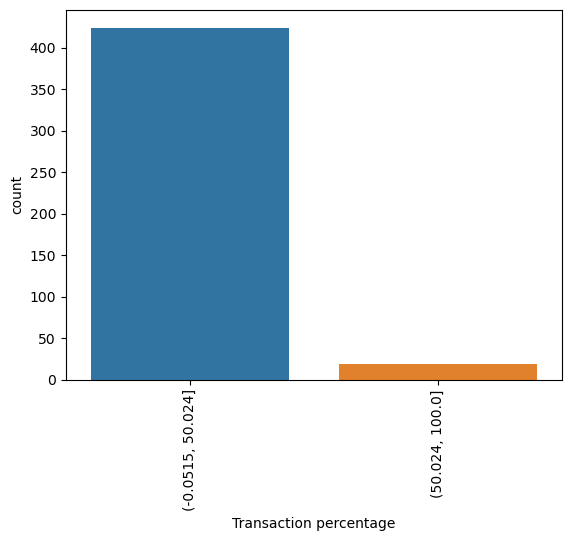

In [34]:
plot = sns.countplot(x=pd.cut(df_fraud_job[df_fraud_job.is_fraud == 1]['Transaction percentage'], bins = 2))
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

Job with fraudulent transactions

In [35]:
df_fraud_job.loc[(df_fraud_job.is_fraud == 1) & (df_fraud_job['Transaction percentage'] >= 50)].job

2                  Accountant, chartered
39                Air traffic controller
64        Armed forces technical officer
94                  Broadcast journalist
111                      Careers adviser
198           Contracting civil engineer
218                               Dancer
318                       Engineer, site
374              Forest/woodland manager
421                            Homeopath
450                     Industrial buyer
453                  Information officer
493                      Legal secretary
619                    Personnel officer
758    Sales promotion account executive
787                          Ship broker
795                            Solicitor
898                   Veterinary surgeon
906                    Warehouse manager
Name: job, dtype: object

Observation:
- The above are the jobs where fraud transaction frequencies have been noted. 
- Transaction contains the job feature value as - Engineer, water, Operational investment banker, Software engineer.

Inference:

- The people in the jobs with high number of fraudulent transactions can be alerted about the credit card transaction frauds so that they can be more carefull while using their credit cards.

#### Exploring Category data

In [36]:
df.category.value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

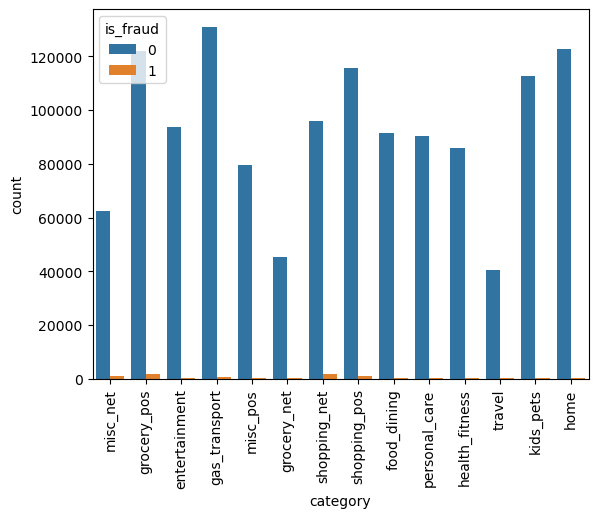

In [37]:
plot = sns.countplot(x='category', data=df, hue=df["is_fraud"].astype("str"))
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [38]:
#constructing the category-transaction count distribution
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['category', 'category_count']

#creating the zip-fraud distribution
df_fraud_category = df[['category', 'trans_num', 'is_fraud']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['category', 'is_fraud', 'Transaction count']

df_fraud_category = df_fraud_category.merge(df_category[['category', 'category_count']], how='inner', on='category')

df_fraud_category['Transaction percentage'] = (df_fraud_category['Transaction count']/df_fraud_category['category_count'])*100

#viewing the top categories with high fraudulent transaction volumes
df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False)

,category,is_fraud,Transaction count,category_count,Transaction percentage
23,shopping_net,1,1713,97543,1.756149
17,misc_net,1,915,63287,1.445795
9,grocery_pos,1,1743,123638,1.409761
25,shopping_pos,1,843,116672,0.722538
5,gas_transport,1,618,131659,0.469394
19,misc_pos,1,250,79655,0.313853
7,grocery_net,1,134,45452,0.294817
27,travel,1,116,40507,0.286370
1,entertainment,1,233,94014,0.247835
21,personal_care,1,220,90758,0.242403


C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


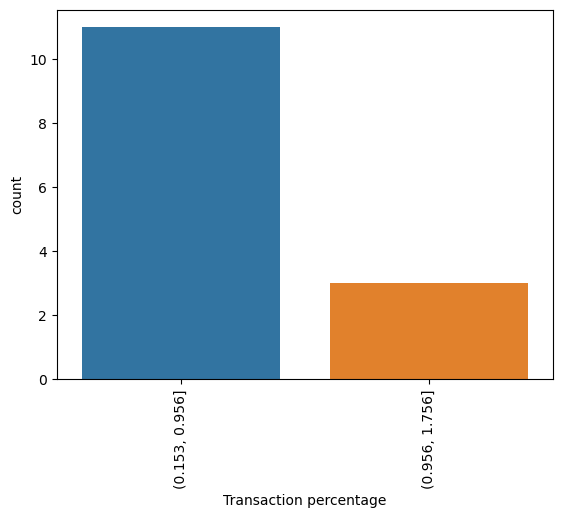

In [39]:
plot = sns.countplot(x=pd.cut(df_fraud_category[df_fraud_category.is_fraud == 1]['Transaction percentage'], bins = 2))
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

Category with fraudulent transactions

In [40]:
df_fraud_category.loc[(df_fraud_category.is_fraud == 1) & (df_fraud_category['Transaction percentage'] >= 1)].category

9      grocery_pos
17        misc_net
23    shopping_net
Name: category, dtype: object

Observation:
- Out of All categories shopping_net category has the most number of fraudulent transactions.


#### Exploring Merchant data

In [41]:
df['merchant'].nunique()

693

In [42]:
#constructing the merchant-transaction count distribution
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['merchant', 'merchant_count']

#creating the zip-fraud distribution
df_fraud_merchant = df[['merchant', 'trans_num', 'is_fraud']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['merchant', 'is_fraud', 'Transaction count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['merchant', 'merchant_count']], how='inner', on='merchant')

df_fraud_merchant['Transaction percentage'] = (df_fraud_merchant['Transaction count']/df_fraud_merchant['merchant_count'])*100

#viewing the top 20 merchant with high fraudulent transaction volumes
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,merchant,is_fraud,Transaction count,merchant_count,Transaction percentage
672,fraud_Kozey-Boehm,1,48,1866,2.572347
489,"fraud_Herman, Treutel and Dickens",1,33,1300,2.538462
606,fraud_Kerluke-Abshire,1,41,1838,2.230686
159,fraud_Brown PLC,1,26,1176,2.210884
400,fraud_Goyette Inc,1,42,1943,2.161606
1220,fraud_Terry-Huel,1,43,1996,2.154309
562,fraud_Jast Ltd,1,42,1953,2.150538
1100,"fraud_Schmeler, Bashirian and Price",1,41,1968,2.083333
145,fraud_Boyer-Reichert,1,38,1908,1.991614
742,"fraud_Langworth, Boehm and Gulgowski",1,39,1969,1.980701


C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


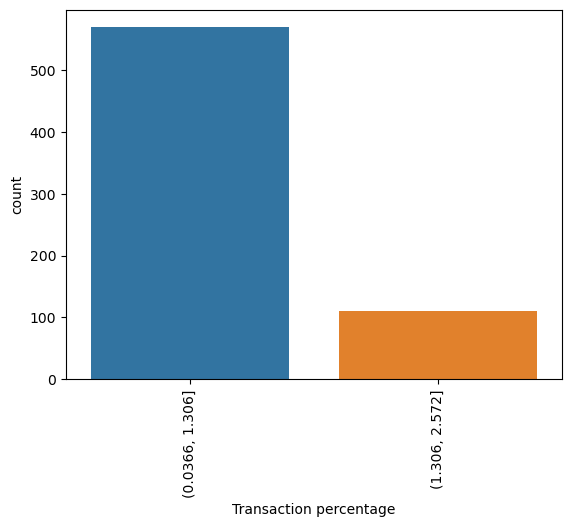

In [43]:
plot = sns.countplot(x=pd.cut(df_fraud_merchant[df_fraud_merchant.is_fraud == 1]['Transaction percentage'], bins = 2))
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

number of merchants with more than one percent fraudulent transactions

In [44]:
len(df_fraud_merchant.loc[(df_fraud_merchant.is_fraud == 1) & (df_fraud_merchant['Transaction percentage'] >= 1)].merchant)

145

Names of merchants with more than one percent fraudulent transactions

In [45]:
df_fraud_merchant.loc[(df_fraud_merchant.is_fraud == 1) & (df_fraud_merchant['Transaction percentage'] >= 2)].merchant

159                         fraud_Brown PLC
400                       fraud_Goyette Inc
489       fraud_Herman, Treutel and Dickens
562                          fraud_Jast Ltd
606                   fraud_Kerluke-Abshire
672                       fraud_Kozey-Boehm
1100    fraud_Schmeler, Bashirian and Price
1220                       fraud_Terry-Huel
Name: merchant, dtype: object

Observation:
- From the above plots and dataframes created, it can be observed that aboout 69 merchants have more than 1% transactions associated with them as fraudulent transactions.

Inference:

- The aforementioned merchants can be checked for fraudulent practices. They also can be alerted about the fraudulent practices happening and be educated about how to avoid them.

**Now that we are done with the EDA process we will now proceed with creating the dummy variables and encoding the features where ever require in our dataset**

# Feature Encoding

##### One Hot Encoding

In [46]:
#one-hot encoding the category variable
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True,dtype='int')
#one-hot encoding the gender variable
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True,dtype='int')
#one-hot encoding the day_of_week variable
day_of_week_onehot = pd.get_dummies(df.trans_day, prefix='day', drop_first=True,dtype='int')
#one-hot encoding the age variable
age_onehot = pd.get_dummies(df.age, prefix='age', drop_first=True,dtype='int')

In [47]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot,age_onehot], axis=1)

df1.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,age_87,age_88,age_89,age_90,age_91,age_92,age_93,age_94,age_95,age_96
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,0,0,0,0,0,0,0,0,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,0,0,0,0,0,0,0,0,0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,0,0,0,0,0,0,0,0,0,0


Now, some features like 'cc_num', 'trans_num' are not significant in context of our analysis and hence can be removed

In [48]:
df1.drop([ 'cc_num', 'trans_num'], axis=1, inplace=True)

In [49]:
df1.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long',
       ...
       'age_87', 'age_88', 'age_89', 'age_90', 'age_91', 'age_92', 'age_93',
       'age_94', 'age_95', 'age_96'],
      dtype='object', length=122)

- In the above df1 Dataframe, the feature 'merchant' can be dropped since it has lot of unique values and it is hard to encode all of them. And the same applies to the variables - 'street', 'city', 'state' and 'job'
- Similarly, the variables - 'age', 'category', 'gender', 'trans_day_of_week' can also be dropped since they have already been encoded.

In [50]:
df1.drop(['merchant','street','city','state','job',
          'category','gender','trans_day',
          'age'],axis=1, inplace=True)
df1.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour',
       ...
       'age_87', 'age_88', 'age_89', 'age_90', 'age_91', 'age_92', 'age_93',
       'age_94', 'age_95', 'age_96'],
      dtype='object', length=113)

Checking the correlations between the columns

In [51]:
df1.dtypes

amt         float64
zip           int64
lat         float64
long        float64
city_pop      int64
             ...   
age_92        int32
age_93        int32
age_94        int32
age_95        int32
age_96        int32
Length: 113, dtype: object

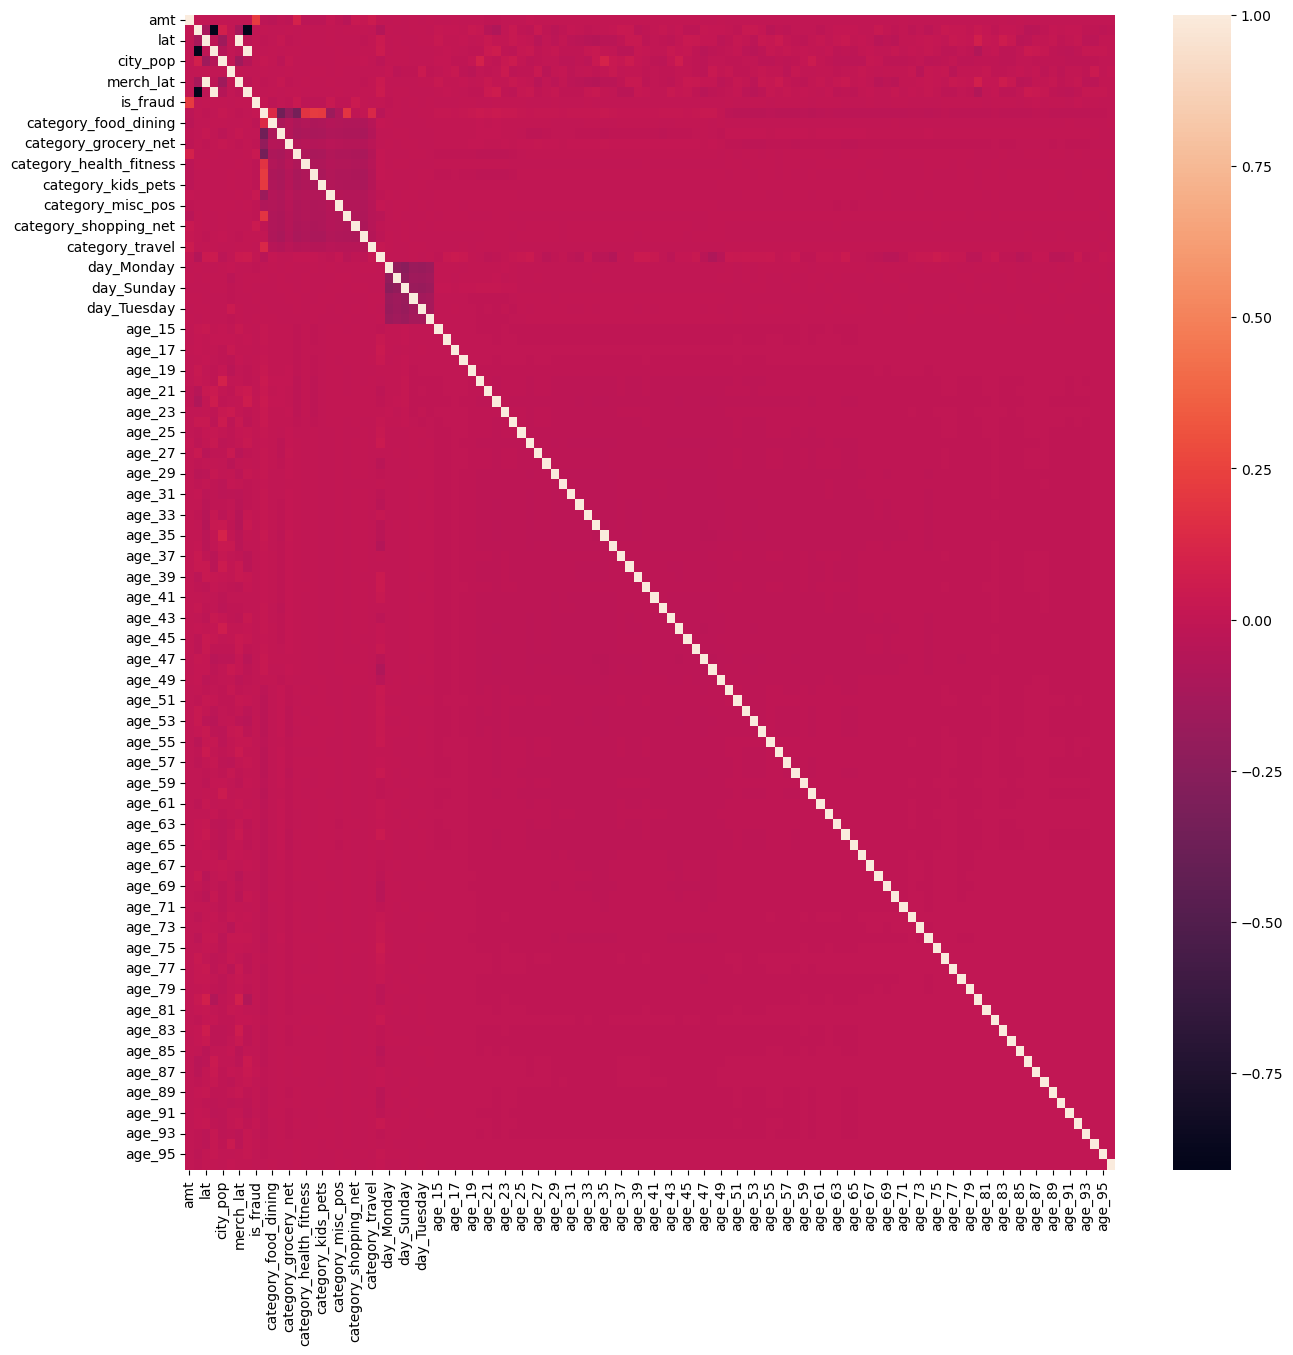

In [52]:
df_random_under_corr = df1.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(df_random_under_corr)
plt.show()

Now, since there are a lot of variables let us get the variables that have high correlation using a function that outputs the variables with correlation between them above a certain threshold.

In [53]:
def correlation(dataset, threshold):
    col_corr = set() # This set stores the highly correlated columns
    corr_matrix = dataset.corr(numeric_only=True) #correlation matrix
    #traversing the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] #selecting columns above threshold
                col_corr.add(colname) #adding columns to set
    return col_corr

In [ ]:
corr_features = correlation(df1,0.85)
corr_features

As it can be seen, there are no features that have a correlation of above 85%. Hence, it is safe to proceed with out model building.

# Model Development

In [ ]:
#storing the number of values in each class
non_fraud_count, fraud_count = df1.is_fraud.value_counts()

In [ ]:
print('Non fraud Transactions:',non_fraud_count)
print('Fraud Transactions:',fraud_count)

This is an imblance data, we have to manage this data, otherwise our model will be Overfit.

In [ ]:
#storing the numerical columns of the data and removing unnecessary variables
df_num = df1.select_dtypes(include='number')
df_num.drop(['zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long'],
            axis=1, inplace=True)
df_num.columns

In [ ]:
#splitting dataset in features and targets
X = df_num.drop(['is_fraud'],axis=1)
y = df_num.is_fraud

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
Counter(y)

In [ ]:
sampler=RandomUnderSampler()
X,y=sampler.fit_resample(X,y)
Counter(y)

Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
Scaled_X=sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
lr=LogisticRegression(solver='liblinear', max_iter=200)
r=RandomForestClassifier()
d=DecisionTreeClassifier()

In [ ]:
lr.fit(X_train,y_train)
r.fit(X_train,y_train)
d.fit(X_train,y_train)

In [ ]:
lr_train_pred=lr.predict(X_train)
r_train_pred=r.predict(X_train)
d_train_pred=d.predict(X_train)

In [ ]:
lr_test_pred=lr.predict(X_test)
r_test_pred=r.predict(X_test)
d_test_pred=d.predict(X_test)

# Model Evaluation and Validation

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

Models Performances Over Train data

**Accuracy score**

Training Data

In [ ]:
print('Logistic Regression\n',accuracy_score(y_train,lr_train_pred))
print('\nRandom Forest\n',accuracy_score(y_train,r_train_pred))
print('\nDecision Tree\n',accuracy_score(y_train,d_train_pred))

Testing Data

In [ ]:
print('Logistic Regression\n',accuracy_score(y_test,lr_test_pred))
print('\nRandom Forest\n',accuracy_score(y_test,r_test_pred))
print('\nDecision Tree\n',accuracy_score(y_test,d_test_pred))

**Precision score**

Training Data

In [ ]:
print('Logistic Regression\n',precision_score(y_train,lr_train_pred))
print('\nRandom Forest\n',precision_score(y_train,r_train_pred))
print('\nDecision Tree\n',precision_score(y_train,d_train_pred))

Testing Data

In [ ]:
print('Logistic Regression\n',precision_score(y_test,lr_test_pred))
print('\nRandom Forest\n',precision_score(y_test,r_test_pred))
print('\nDecision Tree\n',precision_score(y_test,d_test_pred))

**Recall score**

Training Data

In [ ]:
print('Logistic Regression\n',recall_score(y_train,lr_train_pred))
print('\nRandom Forest\n',recall_score(y_train,r_train_pred))
print('\nDecision Tree\n',recall_score(y_train,d_train_pred))

Testing Data

In [ ]:
print('Logistic Regression\n',recall_score(y_test,lr_test_pred))
print('\nRandom Forest\n',recall_score(y_test,r_test_pred))
print('\nDecision Tree\n',recall_score(y_test,d_test_pred))

**Confusion matrix**

Training Data

In [ ]:
print('Logistic Regression\n',confusion_matrix(y_train,lr_train_pred))
print('\nRandom Forest\n',confusion_matrix(y_train,r_train_pred))
print('\nDecision Tree\n',confusion_matrix(y_train,d_train_pred))

Testing Data

In [ ]:
print('Logistic Regression\n',confusion_matrix(y_test,lr_test_pred))
print('\nRandom Forest\n',confusion_matrix(y_test,r_test_pred))
print('\nDecision Tree\n',confusion_matrix(y_test,d_test_pred))

**Classification Report**

Training Data

In [ ]:
print('Logistic Regression\n',classification_report(y_train,lr_train_pred))
print('\nRandom Forest\n',classification_report(y_train,r_train_pred))
print('\nDecision Tree\n',classification_report(y_train,d_train_pred))

**F1 score**

In [ ]:
print('Logistic Regression\n',f1_score(y_train,lr_train_pred))
print('\nRandom Forest\n',f1_score(y_train,r_train_pred))
print('\nDecision Tree\n',f1_score(y_train,d_train_pred))

**ROC Curve**

In [ ]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train,lr_train_pred)
fpr_r, tpr_r, thresholds_r = roc_curve(y_train,r_train_pred)
fpr_d, tpr_d, thresholds_d = roc_curve(y_train,d_train_pred)

In [ ]:
auc_score_lr=roc_auc_score(y_train,lr_train_pred)
auc_score_r=roc_auc_score(y_train,r_train_pred)
auc_score_d=roc_auc_score(y_train,d_train_pred)

In [ ]:
def plot(fpr,tpr,auc):
    plt.figure(figsize=(5,3))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
rocs={'Logistic Regression':[fpr_lr,tpr_lr,auc_score_lr],'Random Forest':[fpr_r,tpr_r,auc_score_r],'Decision Tree':[fpr_d,tpr_d,auc_score_d]}

In [ ]:
for i in rocs:
    print(i,'\n')
    plot(rocs[i][0],rocs[i][1],rocs[i][2])

**Perform Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

Logistic Regression:

- Training Data

In [ ]:
scores=cross_val_score(lr,X_train,y_train,cv=5)
print('Individual Scores\n',scores)
print('\nAverage Scores\n',scores.mean())

- Testing Data

In [ ]:
scores=cross_val_score(lr,X_test,y_test,cv=5)
print('Individual Scores\n',scores)
print('\nAverage Scores\n',scores.mean())

Random Forest:

-Training Data

In [ ]:
scores=cross_val_score(r,X_train,y_train,cv=5)
print('Individual Scores\n',scores)
print('\nAverage Scores\n',scores.mean())

- Testing Data

In [ ]:
scores=cross_val_score(r,X_test,y_test,cv=5)
print('Individual Scores\n',scores)
print('\nAverage Scores\n',scores.mean())

Decision Tree:

- Training Data

In [ ]:
scores=cross_val_score(d,X_train,y_train,cv=5)
print('Individual Scores\n',scores)
print('\nAverage Scores\n',scores.mean())

- Testing Data

In [ ]:
scores=cross_val_score(d,X_test,y_test,cv=5)
print('Individual Scores\n',scores)
print('\nAverage Scores\n',scores.mean())

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Logistic Regression Hyperparameters:
logistic_param_grid = {'C': [0.1, 1, 10],'solver': ['newton-cg','liblinear'],'max_iter': [100, 200]}

#Random Forest Hyperparameters:
rf_param_grid = {'n_estimators': [50, 100],'max_depth': [10, 20],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}

#Decision Tree Hyperparameters:
dt_param_grid = {'max_depth': [None, 10],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}

In [ ]:
# Logistic Regression
logistic_grid_search = GridSearchCV(lr, logistic_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
logistic_grid_search.fit(X_train, y_train)
print(f"Logistic Regression Best Params:\n{logistic_grid_search.best_params_}")
print(f"\nLogistic Regression Best Score:\n{logistic_grid_search.best_score_:.3f}")
print('\n\n')
# Random Forest
rf_grid_search = GridSearchCV(r, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print(f"Random Forest Best Params:\n{rf_grid_search.best_params_}")
print(f"\nRandom Forest Best Score:\n{rf_grid_search.best_score_:.3f}")
print('\n\n')
# Decision Tree
dt_grid_search = GridSearchCV(d, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
print(f"Decision Tree Best Params:\n{dt_grid_search.best_params_}")
print(f"\nDecision Tree Best Score:\n{dt_grid_search.best_score_:.3f}")

In [ ]:
y

In [ ]:
check=lr.predict(X.loc[1295491].values.reshape(1,-1))
if check[0]==0:
    print("Not Fraud")
else:
    print("fraud")